In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
from sklearn import metrics 

In [81]:
dataset = pd.read_csv('C:\\Users\\Eric\\Desktop\\4105\\HW2\\diabetes.csv')
x = dataset.values[:,6]
y = dataset.values[:,8]

x = x.reshape(-1,1)


In [82]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, x, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 66.025% (4.372%)


In [83]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state=0)

model = LogisticRegression(solver='liblinear')
model.fit(xTrain, yTrain)
predicted = model.predict(xTest)
matrix = confusion_matrix(yTest, predicted)

In [84]:
report = classification_report(yTest, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.71      0.95      0.81       107
         1.0       0.50      0.11      0.18        47

    accuracy                           0.69       154
   macro avg       0.60      0.53      0.49       154
weighted avg       0.64      0.69      0.62       154



Text(0.5, 257.44, 'Predicted label')

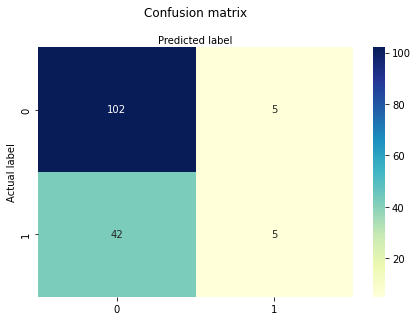

In [85]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 